In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

2024-11-11 15:02:58.432786: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-11 15:02:58.470226: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-11 15:02:59.001145: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Coletando dados

df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Gadiformes/RJ_Reconstrucao_Gadiformes_2024_10_30.xlsx')

df_Abrotea = pd.DataFrame(df[['Ano','Abrotea_art','Abrotea_ind','Abrotea_art_ind']])

#Somando art e ind em art_ind
for i in range(len(df_Abrotea['Ano'])):
  if pd.isnull(df_Abrotea.iloc[i,3])==True and pd.isnull(df_Abrotea.iloc[i,2])==False and pd.isnull(df_Abrotea.iloc[i,1])==False:
    df_Abrotea.iloc[i,3] = df_Abrotea.iloc[i,2] + df_Abrotea.iloc[i,1] 


dados = df_Abrotea[['Ano','Abrotea_art','Abrotea_art_ind']].dropna().reset_index(drop=True)

#Fazendo as proporções
for i in range(len(dados['Ano'])):
  dados.loc[i,'Prop_Abrotea_art'] = dados.loc[i,'Abrotea_art'] / dados.loc[i,'Abrotea_art_ind']


anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([1976,1977])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()



prop = dados['Prop_Abrotea_art'].values

dados.head()

,Ano,Abrotea_art,Abrotea_art_ind,Prop_Abrotea_art
0,1988,5.0,11.0,0.454545
1,1996,0.5,47.5,0.010526
2,1997,5.0,276.0,0.018116
3,2001,3.5,423.0,0.008274
4,2002,1.5,292.5,0.005128


In [3]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

prop_mean = np.mean(prop)
prop_std = np.std(prop)
prop_norm = (prop - prop_mean)/prop_std

In [25]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,prop_norm, epochs=30, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Gadiformes/Abrótea/pesos prop art/.weights.h5', overwrite=True)

Epoch 1/30


/home/andre/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 819ms/step - loss: 0.9950
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9684
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.9435
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9177
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.8914
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.8629
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.8325
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.8016
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.7728
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.7483
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.7310
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.7194
Epoch 13/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.7053
Epoch 14/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6827
Epoch 15/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.6554
Epoch 16/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms

In [5]:
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Gadiformes/Abrótea/pesos prop art/.weights.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Previsões dos dados ausentes: [[0.7062218 ]
 [0.67652696]]


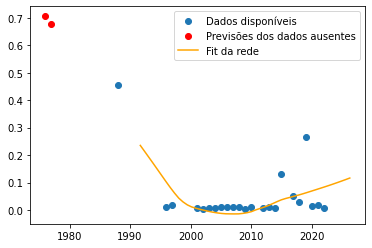

In [26]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*prop_std + prop_mean
prev_ausentes = model.predict(anos_para_prever_norm)*prop_std + prop_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0
    if prev_ausentes[i]>=1:
        prev_ausentes[i]=1

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,prop,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*prop_std + prop_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

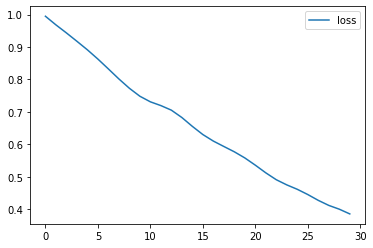

In [27]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [28]:
#Lista de anos sem buracos normalizada e sua predição      (para poder me referir por indices)

anos = np.arange(1950,np.max(anos_para_prever)+1)
anos_norm = (anos-ano_mean)/ano_std
prev_continua = model.predict(anos_norm)*prop_std + prop_mean

for i in range(len(prev_continua)):
    if prev_continua[i]<0:
        prev_continua[i]=0
    if prev_continua[i]>=1:
        prev_continua[i]=1


df_preenchido = df[['Ano','Abrotea_art']]
for i in range(len(prev_continua)):
    if i+1950 in anos_para_prever:
      df_preenchido.loc[i,'Abrotea_art']=df.loc[i,'Abrotea_art_ind']*prev_continua[i]


with pd.option_context('display.max_rows', None,):
    print(df_preenchido)


#Planilha com os dados preenchidos
df_preenchido.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Gadiformes/Abrótea/Desagregação Abrotea_art_ind.xlsx')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
     Ano  Abrotea_art
0   1950          NaN
1   1951          NaN
2   1952          NaN
3   1953          NaN
4   1954          NaN
5   1955          NaN
6   1956          NaN
7   1957          NaN
8   1958          NaN
9   1959          NaN
10  1960          NaN
11  1961          NaN
12  1962          NaN
13  1963          NaN
14  1964          NaN
15  1965          NaN
16  1966          NaN
17  1967          NaN
18  1968          NaN
19  1969          NaN
20  1970          NaN
21  1971          NaN
22  1972          NaN
23  1973          NaN
24  1974          NaN
25  1975          NaN
26  1976     3.531108
27  1977     3.382635
28  1978          NaN
29  1979          NaN
30  1980          NaN
31  1981          NaN
32  1982          NaN
33  1983          NaN
34  1984          NaN
35  1985          NaN
36  1986          NaN
37  1987          NaN
38  1988     5.000000
39  1989          NaN
40  1990          NaN
41  1991          NaN
42  1992        

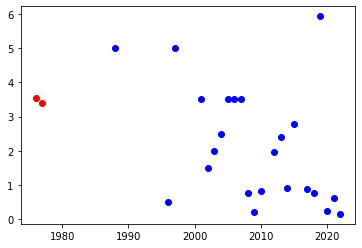

In [29]:
for i in range(len(df_preenchido['Ano'])):
  if i+1950 in anos_para_prever:
    plt.scatter(df_preenchido['Ano'].values[i],df_preenchido['Abrotea_art'].values[i],color='red')
  else:
    plt.scatter(df_preenchido['Ano'].values[i],df_preenchido['Abrotea_art'].values[i],color='blue')